# Downloading GNSS station locations and tropospheric zenith delays

**Author**: Simran Sangha, David Bekaert - Jet Propulsion Laboratory

This notebook provides an overview of the functionality included in the **`raiderDownloadGNSS.py`** program. Specifically, we outline examples on how to access and store GNSS station location and tropospheric zenith delay information over a user defined area of interest and span of time. In this notebook, we query GNSS stations spanning California between 2016 and 2018. 

We will outline the following downloading options to access station location and zenith delay information:
- For a specified range of years
- For a specified time of day
- Confined to a specified geographic bounding box
- Confined to an apriori defined list of GNSS stations

<div class="alert alert-warning">
The initial setup (<b>Prep</b> section) should be run at the start of the notebook. All other sections (examples and applications) do not need to be run in order.
</div>

<div class="alert alert-danger">
<b>Potential Errors/Warnings:</b> 
    
- RAiDER needs to be installed to run this notebook
- Most of the examples below specify the use of all available cpus `--cpus all`. If you anticipate this would be an issue on your machine, please adjust to a more conservative number accordingly (e.g. `--cpus 8`).
- Just note that downloading data with less than 8 cpus may be very time-consuming and not recommended, while most other steps should run quickly.
</div>

<div class="alert alert-info">
    <b>Terminology:</b>
    
- *GNSS*: Stands for Global Navigation Satellite System. Describes any satellite constellation providing global or regional positioning, navigation, and timing services.
- *tropospheric zenith delay*: The precise atmospheric delay satellite signals experience when propagating through the troposphere.
    
    </div>
    

## Table of Contents:
<a id='example_TOC'></a>

[**Overview of the raiderDownloadGNSS.py program**](#overview)
- [1. Define spatial extent and/or apriori list of stations](#overview_1)
- [2. Run parameters](#overview_2)

[**Examples of the raiderDownloadGNSS.py program**](#examples)
- [Example 1. Access data for specified year, time-step, time of day, and across specified spatial subset](#example_1)
- [Example 2. Access data for specified range of years, time-step, time of day, and across specified spatial subset, with the maximum allowed CPUs](#example_2)

## Prep: Initial setup of the notebook

Below we set up the directory structure for this notebook exercise. In addition, we load the required modules into our python environment using the **`import`** command.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Defining the home and data directories
tutorial_home_dir = os.path.abspath(os.getcwd())
work_dir = os.path.abspath(os.getcwd())
print("Tutorial directory: ", tutorial_home_dir)
print("Work directory: ", work_dir)

# Verifying if RAiDER is installed correctly
try:
    from RAiDER import downloadGNSSDelays
except:
    raise Exception('RAiDER is missing from your PYTHONPATH')

os.chdir(work_dir)

Tutorial directory:  /Users/ssangha/Downloads/RAiDER_work/RAiDER-docs/notebooks/raiderDownloadGNSS
Work directory:  /Users/ssangha/Downloads/RAiDER_work/RAiDER-docs/notebooks/raiderDownloadGNSS


## Supported GNSS provider
Currently **`raiderDownloadGNSS.py`** is able to access the UNR Geodetic Laboratory GNSS archive. The creation of a user account and/or special privileges are not necessary.
Data naming conventions are outlined here: http://geodesy.unr.edu/gps_timeseries/README_trop2.txt
This archive does not require a license agreement nor a setup of a user account.

## Overview of the raiderDownloadGNSS.py program
<a id='overview'></a>

The **`raiderDownloadGNSS.py`** program allows for easy access of GNSS station locations and tropospheric zenith delays. Running **`raiderDownloadGNSS.py`** with the **`-h`** option will show the parameter options and outline several basic, practical examples. 

Let us explore these options:

In [ ]:
!raiderDownloadGNSS.py -h

### 1. Define spatial extent and/or apriori list of stations
<a id='overview_1'></a>

#### Geographic bounding box (**`--bounding_box BOUNDING_BOX`**)

An area of interest may be specified as `SNWE` coordinates using the **`--bounding_box`** option. Coordinates should be specified as a space delimited string surrounded by quotes. This example below would restrict the query to stations over northern California:
**`--bounding_box '36 40 -124 -119'`**

If no area of interest is specified, the entire global archive will be queried.

#### Textfile with apriori list of station names  (**`--station_file STATION_FILE`**)

The query may be restricted to an apropri list of stations. To pass this list to the program, a text file containing a list of 4-char station IDs separated by newlines must be passed as an argument for the **`--station_file`** option.

If used in conjunction with the **`--bounding_box`** option outlined above, then listed stations which fall outside of the specified geographic bounding box will be discarded.

As an example refer to the text-file below, which would be passed as so: **`--station_file support_docs/CA_subset.txt`**

In [ ]:
!head support_docs/CA_subset.txt

### 2. Run parameters
<a id='overview_2'></a>

#### Output directory (**`--out OUT`**)

Specify directory to deposit all outputs into with **`--out`**. Absolute and relative paths are both supported.

By default, outputs will be deposited into the current working directory where the program is launched.

#### GPS repository (**`--gpsrepo GPS_REPO`**)

Specify GPS repository you wish to query with **`--gpsrepo`**.

NOTE that currently only the following archive is supported: UNR

#### Date(s) and step (**`----date DATELIST [DATELIST ...]`**)

**REQUIRED** argument. Specify valid year(s) and step in days **`--date DATE DATE STEP`** to access delays (format YYYYMMDD YYYYMMDD DD). Can be a single date (e.g. '20200101'), two dates between which data for every day between and inclusive is queried (e.g. '2017 2019'), or two dates and a step for which increment in days data is queried (e.g. '2019 2019 12').

Note that this option mirrors a similar option as found in the script `raiderDelay.py`, is used to download weather model data for specified spatiotemporal constraints (i.e. the counterpart to the `raiderDownloadGNSS.py` which downloads GNSS data).

#### Time of day (**`--returntime RETURNTIME`**)

Return tropospheric zenith delays closest to 'HH:MM:SS' time specified with **`--returntime`**. 

Note that data is generally archived in 3 second increments. Thus if a time outside of this increment is specified (e.g. '00:00:02'), then the input is rounded to the closest 3 second increment (e.g. '00:00:03')

If not specified, the delays for all times of the day will be returned.

#### Physically download data (**`--download`**)

By default all data is virtually accessed from external zip and tarfiles. If **`--download`** is specified, these external files will be locally downloaded and stored. 

Note that this option is **not recommended** for most purposes as it is not neccesary to proceed with statistical analyses, as the code is designed to handle the data virtually.

#### Number of CPUs to be used (**`--cpus NUMCPUS`**)

Specify number of cpus to be used for multiprocessing with **`--cpus`**. For most cases, multiprocessing is essential in order to access data and perform statistical analyses within a reasonable amount of time.

May specify **`--cpus all`** at your own discretion in order to leverage all available CPUs on your system.

By default 8 CPUs will be used.

#### Verbose mode (**`--verbose`**)

Specify **`--verbose`** to print all statements through entire routine. For example, print each station and year within a loop as it is being accessed by the program.

## Examples of the **`raiderDownloadGNSS.py`** program
<a id='examples'></a>

### Example 1. Access data for specified year, time-step, time of day, and across specified spatial subset <a id='example_1'></a>

Virtually access GNSS station location and zenith delay information for the year '2016', for every 24 days, and at a UTC time of day 'HH:MM:SS' of '00:00:00', and across a geographic bounding box '32 42 -125 -114' spanning over California.

The footprint of the specified geographic bounding box is depicted in **Fig. 1**.

<img src="support_docs/bbox_footprint.png" alt="footprint" width="700">
<center><b>Fig. 1</b> Footprint of geopraphic bounding box used in the examples below. </center>

In [ ]:
!raiderDownloadGNSS.py --out products_ex1 --date 20160101 20161231 24 --returntime '00:00:00' --bounding_box '32 42 -125 -114'

Now we can take a look at the generated products:

In [ ]:
!ls products_ex1

A list of coordinates for all stations found within the specified geographic bounding box are recorded within **`gnssStationList_overbbox.csv`**:

In [ ]:
!head products_ex1/gnssStationList_overbbox.csv

A list of all URL paths for zipfiles containing all tropospheric zenith delay information for a given station and year are recording within **`gnssStationList_overbbox_withpaths.csv`**:

In [ ]:
!head products_ex1/gnssStationList_overbbox_withpaths.csv

The zipfiles listed within **`gnssStationList_overbbox_withpaths.csv`** are virtually accessed and queried for internal tarfiles that archive all tropospheric zenith delay information acquired for a given day of the year. 

Since we an explicit time of day '00:00:00' and time-step of 24 days was specified above, only data every 24 days from each tarfile corresponding to the time of day '00:00:00' is passed along. If no data is available at that time for a given day, empty strings are passed.

This information is then appended to a primary file allocated and named for a given GNSS station.  **`GPS_delays`**:

In [ ]:
!ls products_ex1/GPS_delays

All of the extracted tropospheric zenith delay information stored under **`GPS_delays`** is concatenated with the GNSS station location information stored under **`gnssStationList_overbbox.csv`** into a primary comprehensive file **`UNRcombinedGPS_ztd.csv`**. In this file, the prefix `UNR` denotes the GNSS repository that has been queried, which again may be toggled with the **`--gpsrepo`** option.

**`UNRcombinedGPS_ztd.csv`** may in turn be directly used to perform basic statistical analyses using **`raiderStats.py`**. Please refer to the companion notebook **`raiderStats/raiderStats_tutorial.ipynb`** for a comprehensive outline of the program and examples.

In [ ]:
!head products_ex1/UNRcombinedGPS_ztd.csv

Let's quickly open and visualize the spatial distribution of points in this CSV

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

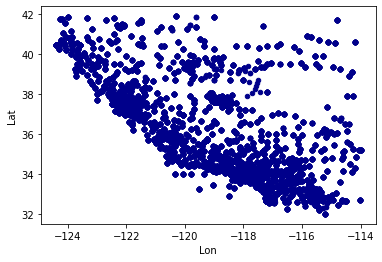

In [6]:
df = pd.read_csv('products_ex1/UNRcombinedGPS_ztd.csv')
df.plot.scatter(x='Lon', y='Lat', c='DarkBlue')

Please refer to the companion notebook **`Pandas_tutorial/Pandas_tutorial.ipynb`** for a more comprehensive overview of working with CSVs using the 'Pandas' module.

### Example 2. Access data for specified range of years and time of day, time-step, and across specified spatial subset, with the maximum allowed CPUs <a id='example_2'></a>

Virtually access GNSS station location and zenith delay information for the years '2016-2018', for every 5 days, at a UTC time of day 'HH:MM:SS' of '00:00:00', and across a geographic bounding box '32 42 -125 -114' spanning over California.

The footprint of the specified geographic bounding box is again depicted in **Fig. 1**.

In addition to querying for multiple years, we will also experiment with using the maximum number of allowed CPUs to save some time! Recall again that the default number of CPUs used for parallelization is 8.

Note that this is the same working example which is the starting point for most of the statistical analyses are outlined in the companion notebook **`raiderStats/raiderStats_tutorial.ipynb`**. Thus, if this example has already been executed, it is recommended to copy/link these outputs over to the next notebook to avoid duplicating efforts and wasting time/coffee.

**NOTE** the following cell will take ~7 minutes to complete. It is *recommended* to take a coffee break!

In [ ]:
!raiderDownloadGNSS.py --out products_ex2 --date 20160101 20181231 5 --returntime '00:00:00' --bounding_box '32 42 -125 -114' --cpus all

Outputs are organized again in a fashion consistent with that outlined under **Ex. 1**.

However now we have queried data spanning from the year 2016 up through 2018. Thus, **`UNRcombinedGPS_ztd.csv`** now contains GNSS station data recorded as late as in the year 2018:

In [ ]:
!grep -m 10 '2018-' products_ex2/UNRcombinedGPS_ztd.csv